## HW 1 - Designing Blockchain

Group 3: Shufeng Li, Wenlin Ye, Yifei Yin  
Github link: https://github.com/yyin422/fall23-5700-group-3/tree/main/HW1

In [24]:
import hashlib 
import random 
import time
import datetime 
import ipyparallel as ipp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1. Blockchain Data Structure

In [25]:
class Block: 
    def __init__(self, index, timestamp, data, previous_hash, nonce = 0):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.previous_hash = previous_hash
        self.hash = self.hash_block()
    
    def hash_block(self):
        sha = hashlib.sha256()
        block_hash = (str(self.index) + str(self.timestamp) + str(self.data) + str(self.previous_hash) + str(self.nonce))
        block_hash = block_hash.encode("utf-8")
        sha.update(block_hash)
        return sha.hexdigest()

In [26]:
block_time = '2022-02-13 23:59:00'
data = 'Blockchain For Data Science'
previous_hash = '9136cfeb0c77b41e1e86cb9940ca9bb65f7aca4e8e366a8ecf9226b735e0c323'
index = 1
new_block = Block(index, block_time, data, previous_hash)
print(new_block.hash)

260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5


In [27]:
# Test Q1
def block_validation(index, block_time, data, previous_hash):
    new_block = Block(index, block_time, data, previous_hash)
    check_string = '260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5'
    print_statement = "This is a valid Block" if str(
        new_block.hash) == check_string else "Please Check your work, this is incorrect."
    print(print_statement)

block_validation(index, block_time, data, previous_hash)


This is a valid Block


### 2. Creating a chain out of single blocks

In [28]:
# create genesis block w/ current time & generic data
def create_genesis_block(): 
    return Block(0, datetime.datetime.now(), "Genesis Block", "0")

# create the next block given the last block on the chain you want to mine
def next_block(last_block, nonce = 0): 
    this_index = last_block.index + 1
    this_timestamp = datetime.datetime.now()
    this_data = "Hey! I'm block " + str(this_index)
    this_prevhash = last_block.hash
    return Block(this_index, this_timestamp, this_data, this_prevhash)

In [29]:
# Test Q2
def genesis_validation(genesis_block):
    block_1 = next_block(genesis_block)
    if block_1.index == 1 and block_1.data == "Hey! I'm block 1" and block_1.previous_hash == genesis_block.hash and str(type(block_1.timestamp)) == "<class 'datetime.datetime'>":
        print("Valid Genesis block")
    else:
        print("Check the code, not a valid genesis block:(")

genesis_block = create_genesis_block()
genesis_validation(genesis_block)


Valid Genesis block


### 3. Generating a complete Blockchain

In [30]:
# create blockchain + genesis block
blockchain= [create_genesis_block()]

# create initial reference to previous block which points to the genesis block
previous_block = blockchain[0]

# number of blocks we want in the bc after genesis block
num_blocks = 10

def complete_chain(num_blocks, blockchain, previous_block):
    for i in range(0, num_blocks):
        block_to_add = next_block(previous_block)
        blockchain.append(block_to_add)
        previous_block = block_to_add

        print(("the block #{} is added to the blockchain".format(block_to_add.index)))
        print("Hash : {}\n".format(block_to_add.hash))


genesis_validation(previous_block)
complete_chain(num_blocks, blockchain, previous_block)


Valid Genesis block
the block #1 is added to the blockchain
Hash : 0f6193ac230b8fe064f39470cb9965ebfb0f9ce23e9be1c03ec1bada29e7934e

the block #2 is added to the blockchain
Hash : 0683e615c7c07de9a4aa11b3ecbf726ad529c3f1a8d491e5a963d39bf26d7108

the block #3 is added to the blockchain
Hash : 39846f670488b8e263c82958514402098c9719dc3a45a5d7059e531565578535

the block #4 is added to the blockchain
Hash : 6ebb2a0bde6da5af38776080f52dfcf0670c7e94bbd57acd53d36f6fd9a6e7af

the block #5 is added to the blockchain
Hash : e63f8c3a9ac4de01dfb49a5ac744e1441a82843be657a34f37de39f40113398a

the block #6 is added to the blockchain
Hash : 450280a3679bf4a584abcdb78b5159ab7fddab5412b0d10f7a025a0a38790760

the block #7 is added to the blockchain
Hash : 068f0344ef59d7392d1de813cdeae18b63e6b1afbf9294e4daf937f866e67725

the block #8 is added to the blockchain
Hash : 30e73d6c20ea8bfb013b65561116f9f59bcb1b544a9341ad782ccaa76802b307

the block #9 is added to the blockchain
Hash : 01a78f181798086a9bd04cd2a7330

In [31]:
# Test Q3
def test_question_3(blockchain, num_blocks): 
    correct = True
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain) - 1): 
        if blockchain[i+1].previous_hash != blockchain[i].hash:
            correct = False
            break

    print_statement = "PASSED! Move on to the next part." if correct else "FAILED! Try again."
    print(print_statement)

test_question_3(blockchain, num_blocks)


PASSED! Move on to the next part.


### 4. Nonce and Difficulty


In [32]:
def generate_nonce(length): 
    return "".join([str(random.randint(0,9)) for i in range(length)])

def generate_difficulty_bound(difficulty =1): 
    diff_str = ""
    diff_str += '0' * difficulty
    diff_str += 'F' * (64 - difficulty)
    diff_str = "0x" + diff_str #specify: hex representation
    #print(diff_str)
    return(int(diff_str, 16)) #specify: want integer of base 10

In [33]:
# given previous block & difficulty metic, find a nonce that results in a lower hash value\
def find_next_block(last_block, difficulty, nonce_length):
    difficulty_bound = generate_difficulty_bound(difficulty)
    start = time.process_time()
    new_block = next_block(last_block)
    hashes_tried = 1
    while int(new_block.hash, 16) > difficulty_bound: 
        nonce = generate_nonce(nonce_length)
        new_block = Block(new_block.index, new_block.timestamp, new_block.data, new_block.previous_hash, nonce)
        hashes_tried += 1
    time_taken = time.process_time() - start
    return(time_taken, hashes_tried, new_block)


In [34]:
# Q4 Test
blockchain = [create_genesis_block()]
previous_block = blockchain[0]
num_blocks = 20
difficulty = 3
nonce_length = 10


def create_blockchain(num_blocks, difficulty, blockchain, previous_block, nonce_length, broadcast=1):
    hash_ls = []
    time_ls = []
    
    for _ in range(0, num_blocks):
        timetaken, hash_tried, block_to_add = find_next_block(previous_block, difficulty, nonce_length)
        blockchain.append(block_to_add)
        previous_block = block_to_add
        hash_ls.append(hash_tried)
        time_ls.append(timetaken)
    
    return hash_ls, time_ls
create_blockchain(num_blocks, difficulty, blockchain, previous_block, nonce_length)


([7444,
  618,
  9420,
  1362,
  358,
  41,
  12778,
  6319,
  2717,
  2779,
  1593,
  4596,
  6309,
  1224,
  1891,
  7641,
  7570,
  1584,
  2291,
  1283],
 [0.0,
  0.046875,
  0.03125,
  0.015625,
  0.0,
  0.0,
  0.09375,
  0.015625,
  0.0,
  0.03125,
  0.015625,
  0.03125,
  0.046875,
  0.015625,
  0.015625,
  0.0625,
  0.03125,
  0.0,
  0.0,
  0.015625])

In [36]:
def blockchain_proof(blockchain, num_blocks):
    correct = True
    bound = generate_difficulty_bound(difficulty)
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain) - 1):
        if blockchain[i + 1].previous_hash != blockchain[i].hash:
            correct = False
            break
        if int(blockchain[i + 1].hash, 16) > bound:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)

blockchain_proof(blockchain, num_blocks)

PASSED!!! Move on to the next Part


### 5. Distributed Network

In [37]:
# Naive miner class that races with other miners to see who can get a certain number of blocks first

class MinerNodeNaive:
    def __init__(self, name, compute):
        self.name = name
        self.compute = compute

    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = datetime.datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))


In [38]:
# Initiate multiple miners on network

miner_1 = MinerNodeNaive("Miner 1", 8)
miner_2 = MinerNodeNaive("Miner 2", 6)
miner_3 = MinerNodeNaive("Miner 3", 9)
miner_4 = MinerNodeNaive("Miner 4", 3)
miner_5 = MinerNodeNaive("Miner 5", 1)
miners = [miner_1, miner_2, miner_3, miner_4, miner_5]


In [40]:
def create_compute_simulation(miner_array): 
    compute_array = []
    for miner in miner_array:
        for i in range(miner.compute):
            compute_array.append(miner.name)
    return compute_array

compute_simulation_array = create_compute_simulation(miners)
random.shuffle(compute_simulation_array)

In [41]:
chain_length = 20
blockchain_distributed = [create_genesis_block()]
genesis_block_dist = blockchain_distributed[0]
chain_difficulty = [random.randint(2, 6) for i in range(chain_length)]
print(chain_difficulty)

[6, 3, 2, 5, 4, 2, 4, 3, 2, 6, 2, 4, 4, 6, 2, 5, 4, 2, 2, 6]


In [42]:
for i in range(len(chain_difficulty)): 
    while len(blockchain_distributed) < i + 2 : 
        next_miner_str = random.sample(compute_simulation_array, 1)[0]
        next_miner = miner_2
        for miner in miners: 
            if next_miner_str == miner.name:
                next_miner = miner
        next_miner.try_hash(chain_difficulty[1], blockchain_distributed)



Block #1 has been added to the blockchain!
Block found by: Miner 3
Hash: 0001dfab3589e10136e4e94433452120c80268ed1cf329880050f88702521ee7

Block #2 has been added to the blockchain!
Block found by: Miner 1
Hash: 0009fa3b000adea8395baf81fbd9186b3e75539c4cc4146d2b3b397608ed019a

Block #3 has been added to the blockchain!
Block found by: Miner 1
Hash: 000ad619ef6ad969555bb98da3306462c90b611bc7b6b3f0af34c55b40817e50

Block #4 has been added to the blockchain!
Block found by: Miner 2
Hash: 00089169da9b22d29021a1906ff8c586b5db05765f2af8add2c83f4dc908fc55

Block #5 has been added to the blockchain!
Block found by: Miner 1
Hash: 000533b95cfc124bf1cc3991eb31562ca441f4b8d77f5206a79a9aa4091c86c5

Block #6 has been added to the blockchain!
Block found by: Miner 1
Hash: 000f30194e8e0944eb049e25cedde13f739c8c30157247c923d7a015394e46d9

Block #7 has been added to the blockchain!
Block found by: Miner 4
Hash: 000412b95dd956f2c5da0870252babeab9f09a0e49779e4fb2a4ca77869c151c

Block #8 has been added to 

### 6. Analytics on the Blockchain Data


In [43]:
num_blocks = 10
blockchain = [create_genesis_block()]
previous_block = blockchain[0]

# diff types of difficulty to analyze
difficulty_0 = 1
difficulty_1 = 2
difficulty_2 = 3
difficulty_3 = 4

nonce_length = 20

hash_array_0, time_array_0 = create_blockchain(num_blocks, difficulty_0, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_0))
hash_array_1, time_array_1 = create_blockchain(num_blocks, difficulty_1, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_1))
hash_array_2, time_array_2 = create_blockchain(num_blocks, difficulty_2, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_2))
hash_array_3, time_array_3 = create_blockchain(num_blocks, difficulty_3, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_3))



Difficulty level: 1 complete
Difficulty level: 2 complete
Difficulty level: 3 complete
Difficulty level: 4 complete


In [44]:
mean_arr_hash = [np.mean(hash_array_0), np.mean(hash_array_1), np.mean(hash_array_2), np.mean(hash_array_3)]
mean_arr_time = [np.mean(time_array_0), np.mean(time_array_1), np.mean(time_array_2), np.mean(time_array_3)]


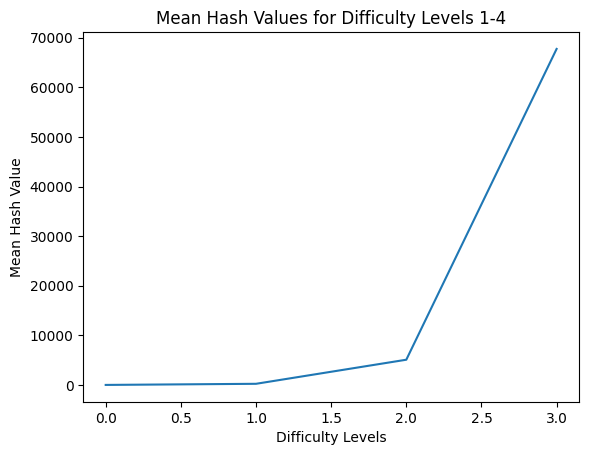

In [45]:
plt.plot(mean_arr_hash)
plt.xlabel("Difficulty Levels")
plt.ylabel("Mean Hash Value")
plt.title('Mean Hash Values for Difficulty Levels 1-4')
plt.show()
